In [1]:
#구글 드라이브 마운트
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


데이터 로딩

In [4]:
#라이브러리 생성
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#데이콘 사이트에서 다운로드한 csv파일 읽어오기
drive_path = "/gdrive/My Drive/"  #폴더의 경로

#csv 파일을 읽어 데이터프레임으로 변환
train = pd.read_csv(drive_path + "titanic/train.csv")
test = pd.read_csv(drive_path + "titanic/test.csv")
submission = pd.read_csv(drive_path + "titanic/submission.csv")
print(train.shape, test.shape, submission.shape)

(891, 12) (418, 11) (418, 2)


In [5]:
train.head()

#train dp니까 survived가 있어 (예측 타식이 되는 목표 변수)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

#test dp니까 survived 열이 없네

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
submission.head()

#test에 들어있는 418명 승객에 대한 생존 여부를 예측하고 예측값을 survived열에 입력해야함

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


데이터 구조

In [8]:
#train 데이터프레임 개요 정보
train.info()

#891개의 데이터가 있다
#2개의 열은 실수형(float64),
#5개의 열은 정수형 (int64),
#5개의 열은 문자열(object)
#891보다 작은 개수의 유효한 데이터가 보이네 -> 부족한 개수만큼 결측값(missing value)이 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
#train 데이터프레임 통계 정보

#describe: 통계정보를 알려줌
train.describe(include='all') #all: 숫자형이 아닌 문자열 등에 대한 정보를 포함하여 보여줌


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


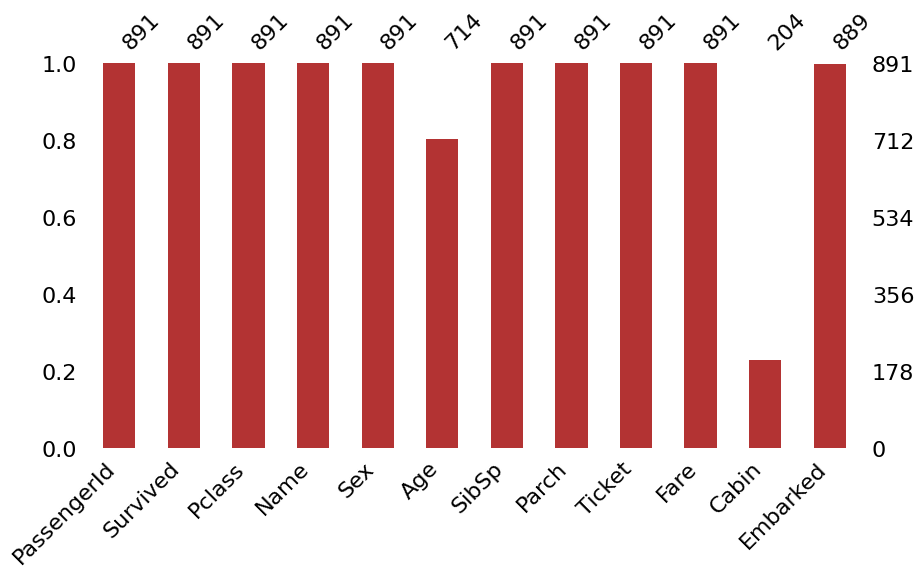

In [10]:
#결측값 분포
import missingno as msno
msno.bar(train, figsize = (10,5), color= (0.7,0.2,0.2))
plt.show()

#age, cabin, embarked 열에 결측값이 있네

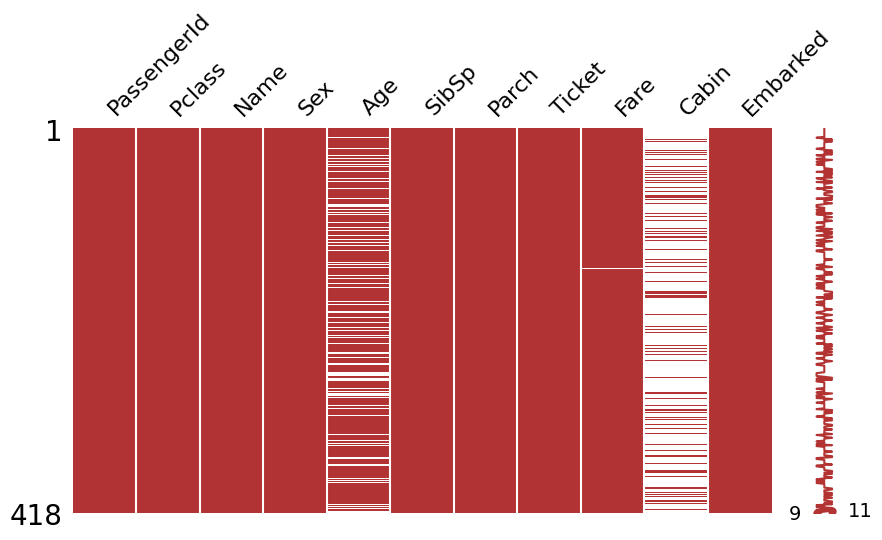

In [11]:
msno.matrix(test,figsize=(10,5),color=(0.7,0.2,0.2))
plt.show()

#matrix 함수를 사용하면 어느 위치에 결측값이 있는지 확인 가능

<ipython-input-12-dece0aaa0b48>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True,cbar=True)


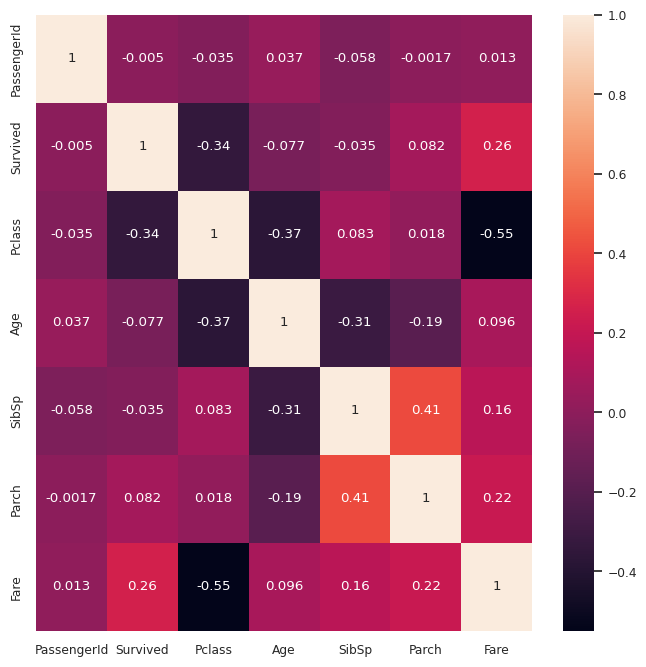

In [12]:
#상관관계분석
#숫자형 변수 간의 상관 관계를 계산하여 히트맵 그리기

plt.figure(figsize= (8,8))
sns.set(font_scale=0.8)
sns.heatmap(train.corr(),annot=True,cbar=True)
plt.show()

#숫자형 데이터로 구성된 열에 대해서만 상관 계수를 계산한다.
#Survived 열과 상관 계수가 높은 feature: Pclass(-0.34) 랑  Fare(0.26)!

#Pclass와 Fare의 상관 계수는 -0.55로 매우 강한 음의 상관 관계가 있다.
#이를 통해 객실 등급에 따라 객실 요금이 달라지는 것을 알 수 있다.

베이스라인 모델

데이터 결합

In [15]:
#타이타닉 전체 데이터셋 준비

#data = train + test
#구분하기 위해 trainsplit열 추가했음

train['TrainSplit'] = 'Train'
test['TrainSplit'] = 'Test'
data = pd.concat([train,test],axis = 0)
print(data.shape)

(1309, 13)


데이터 전처리

In [17]:
#숫자형 피처 추출
data_num = data.loc[:,['Pclass','Age','SibSp','Parch','Fare','Survived']]

#결측값 대체
data_num['Age'] = data_num['Age'].fillna(data_num['Age'].mean())  #평균값으로
data_num['Fare'] = data_num['Fare'].fillna(data_num['Fare'].mode()[0])  #빈도수가 많은 최빈값으로

#학습용 데이터와 예측 대상인 테스트 데이터 구분
selected_features = ['Pclass','Age','SibSp','Parch','Fare']
X_train = data_num.loc[data['TrainSplit']=='Train', selected_features]
y_train = data_num.loc[data['TrainSplit']=='Train','Survived']

X_test = data_num.loc[data['TrainSplit']=='Test', selected_features]

print(X_train.shape, y_train.shape)
print(X_test.shape)

(891, 5) (891,)
(418, 5)


모델 학습 및 검증

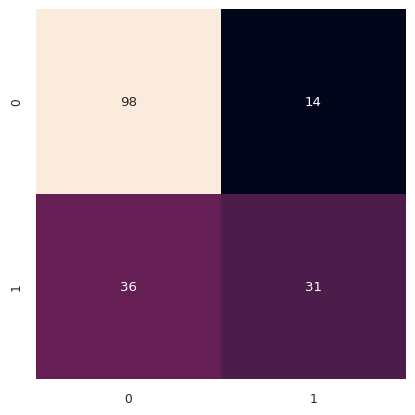

In [21]:
#훈련 - 검증 데이터 분할

#훈련 데이터 80퍼 검증 데이터20퍼로 분할해보자

from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train,
                                            test_size=0.2,
                                            shuffle = True,
                                            random_state=20)

#로지스틱 회구 분류 모델에 훈련 데이터를 입력하여 학습시키자
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_tr,y_tr)
y_val_pred = lr_model.predict(X_val)

#검증 데이터에 대한 예측값을 실제값과 비교하여 혼동 행렬(Confusion Matrix)을 계산하고 그래프를 그려보자
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val,y_val_pred),annot=True, cbar=False, square=True)
plt.show()

#          False
#  예측
#          True
#                   True      False
#                        실제

In [23]:
#평가 지표
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

print("Accuracy:%.4f"%accuracy_score(y_val,y_val_pred))
print("Precision:%.4f"%precision_score(y_val,y_val_pred))
print("Recall:%.4f"%recall_score(y_val,y_val_pred))
print("F1:%.4f"%f1_score(y_val,y_val_pred))
print("AUC:%.4f"%roc_auc_score(y_val,y_val_pred))


Accuracy:0.7207
Precision:0.6889
Recall:0.4627
F1:0.5536
AUC:0.6688


모델 예측

In [30]:
#to_csv함수로 제출파일을 구글 드라이브의 [내 드라이브]폴더에 csv파일로 저장

#test 데이터에 대한 예측값 정리
y_test_pred = lr_model.predict(X_test)

#제출 양식에 맞게 정리하자
submission['Survived'] = y_test_pred.astype(int) #예측값을 정수형으로 변환하고 입력

#제출 파일 저장
submission_filepath = drive_path + 'baseline_num_lr_submission_001.csv'
submission.to_csv(submission_filepath, index= False)
submission.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
